<a href="https://colab.research.google.com/github/ProfessorCash/Colab/blob/master/Visualization_Cheat_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matplotlib

*   https://matplotlib.org/
*   https://github.com/rougier/matplotlib-tutorial
*   https://github.com/ProfessorCash/Cheat-Sheets/blob/master/Jupyter/(Optional-No%20Video)%20-%20Advanced%20Matplotlib%20Concepts.ipynb



In [1]:
import matplotlib.pyplot as plt
#allows to see the plots inside jupyter, otherwise always state plt.show()
%matplotlib inline

#%matplotlib notebook as alternative to inline...makes some plots interactive

#also, for better design use plt.style.use("ggplot")

#example data
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

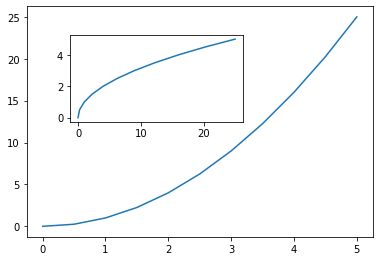

In [2]:
#only use OO-Method (not functional)
fig = plt.figure()
  #figure object creates the white canvas
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
  #list sets position on canvas: left, bottom, width, heigth

#for multiplot add another axes
axes2 = fig.add_axes([0.2 , 0.5, 0.4, 0.3])

axes1.plot(x, y)
axes2.plot(y, x)

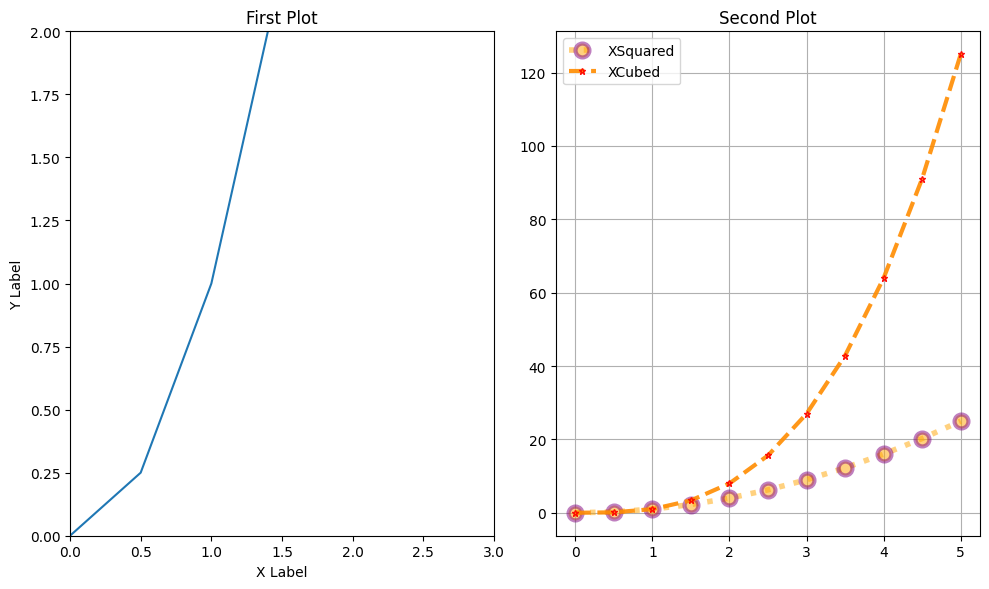

In [3]:
#superior method to above is using subplots right from the start
#specify # of rows (nrows) and columns (ncols) with subplot, this example creates two figures on the canvas, figsize = each figures size in inc, dpi=dots per inch
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize= (10,6), dpi=100)
    #fig, axes is tuple unpacking -> fig is the plt.figure() object, axes is a mtplotlib array (or list) object one can iterate through
    #e.g. for x in axes: x.plot(x, y)
    #since axes is a list, it is iterable -> axes[0].plot(x, y)
    #i.e. tuple unpacking with subplots does the steps fig=plt.figure() and  axes = fig.add_axes([])

#labels, legends, color and style
axes[0].plot(x,y) 
axes[0].set_title("First Plot")
axes[0].set_xlabel("X Label")
axes[0].set_ylabel("Y Label")
#set axes limits of range to be shown
axes[0].set_xlim([0,3])
axes[0].set_ylim([0,2])

#color (or RGB Hex Code "#FF8C00"), linewidth(lw), linestyle (ls), alpha (transparency), markersize (ms), markeredgewidth (mew), markeredgecolor (mec)
axes[1].plot(x,x ** 2, label = "XSquared", color="orange", lw=4, ls=":", alpha=0.5, marker="o", ms=10, mew=3, mec="purple")
axes[1].plot(x,x ** 3, label = "XCubed", color="#FF8C00", lw=3, ls="--", alpha=0.9, marker="*", ms=5, mew=1, mec="red")
axes[1].set_title("Second Plot")
axes[1].yaxis.grid(True)
axes[1].xaxis.grid(True)

axes[1].legend(loc=0)
    #requires label in axes[x]
    #loc=(0.1, 0.1) also possible, from reference bottom left

#no overlapping figures -  run at the end
plt.tight_layout()


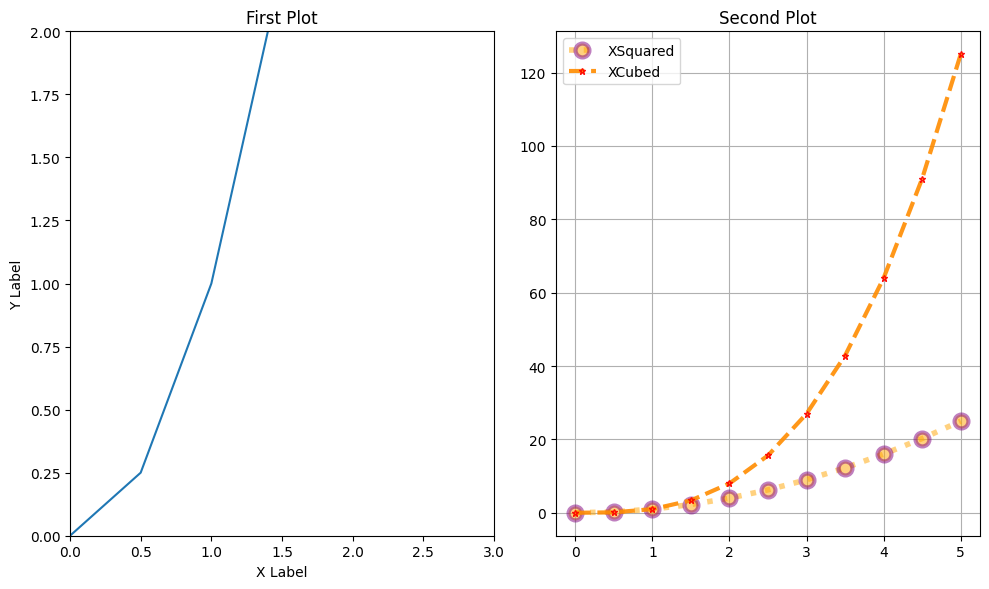

In [4]:
#once all above specified figure can be called by simply entering fig (if cotainer so specified)
fig

In [5]:
#save as file/image
fig.savefig("my_pict.png", dpi = 200)

#Pandas Visualization

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import io #for data from local import
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
from google.colab import files
uploaded = files.upload()

Saving df1 to df1
Saving df2 to df2
Saving df3 to df3
Saving mcdonalds.csv to mcdonalds.csv


In [8]:
df1 = pd.read_csv(io.BytesIO(uploaded['df1']), index_col=0)
df2 = pd.read_csv(io.BytesIO(uploaded['df2']))
df = pd.DataFrame(np.random.randn(1000,2), columns=["a", "b"])

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


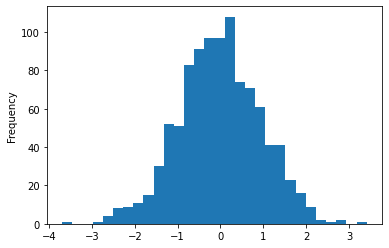

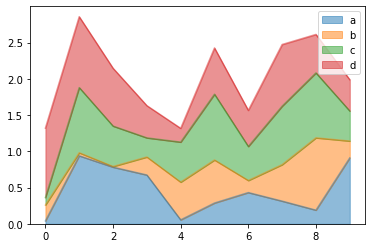

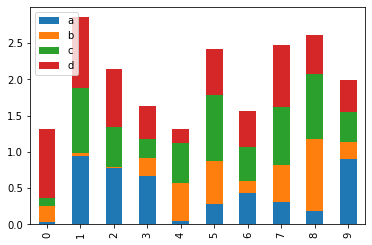

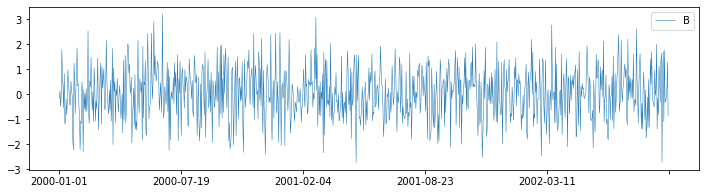

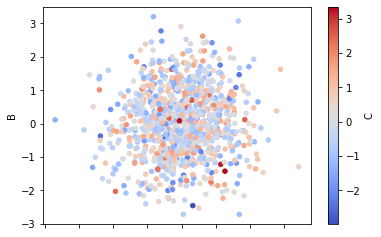

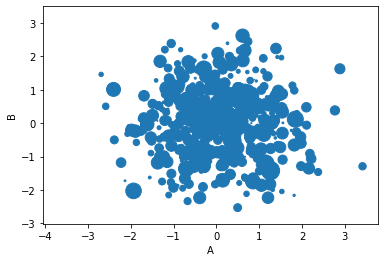

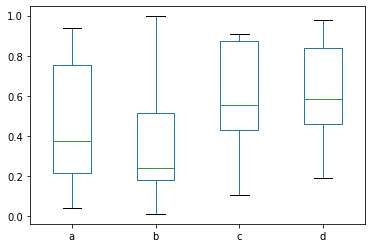

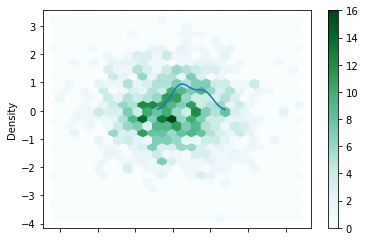

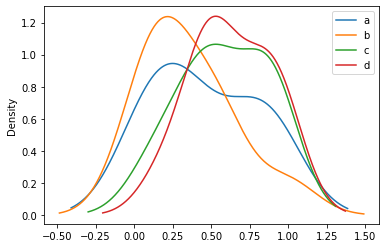

In [9]:
#its basically taken from matplotlib
df1["A"].plot.hist(bins=30) #call column data
df2.plot.area(alpha=0.5)
df2.plot.bar(stacked=True)
df1.plot.line(y="B", figsize=(12,3),lw=0.5)
df1.plot.scatter(x="A",y="B",c="C",cmap="coolwarm") #c=color i.e. this is 3 dimensional information)
df1.plot.scatter(x="A",y="B",s=df1["C"]*100) #s=size thus its scatter + bubble
df2.plot.box()
df.plot.hexbin(x="a",y="b",gridsize=25)
df2["a"].plot.kde() #kernel density estimation plot
df2.plot.kde() #kernel density estimation plot

#Pandas Timeseries Visualization

In [10]:
import matplotlib.dates as dates

In [11]:
mcdon = pd.read_csv(io.BytesIO(uploaded['mcdonalds.csv']), index_col="Date", parse_dates=True)

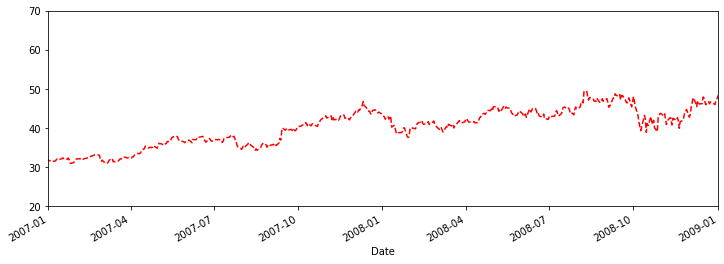

In [12]:
mcdon['Adj. Close'].plot(figsize=(12,4), xlim=["2007-01-01", "2009-01-01"], ylim=(20,70), ls="--", c="red")

In [13]:
#use matplotlib. dates to change to daily/weekly ticks etc.
idx = mcdon.loc["2007-01-01" : "2007-05-01"].index #run index at the end otherwise it will return the loc referenced part of the df
stock = mcdon.loc["2007-01-01" : "2007-05-01"]["Adj. Close"]
stock

Date
2007-01-03    31.662754
2007-01-04    31.424580
2007-01-05    31.424580
2007-01-08    31.547276
2007-01-09    31.605015
                ...    
2007-04-25    35.098239
2007-04-26    35.531283
2007-04-27    35.329196
2007-04-30    34.845630
2007-05-01    35.466327
Name: Adj. Close, Length: 82, dtype: float64

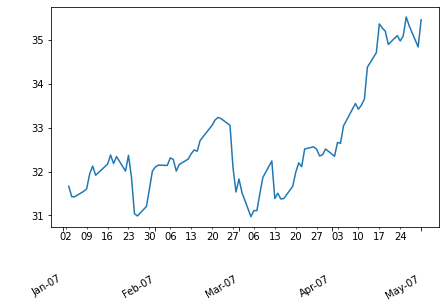

In [16]:
fig,ax = plt.subplots()
ax.plot_date(idx, stock, "-")

#x axis seeting/fromat -> locating
##major locator
ax.xaxis.set_major_locator(dates.MonthLocator()) #setting/Located to month i.e. set tick at every month
ax.xaxis.set_major_formatter(dates.DateFormatter("\n\n\n\n%b-%y")) #how setting/locator is formated; \n to get some space for minor locator
##minor locator
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%d"))

plt.tight_layout()
fig.autofmt_xdate() #if tight_layout is not enough to remedy overlay